# Libraries

In [1]:
import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Built-in libraries
#
import pandas as pd
import numpy  as np


# # =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# # Visualization libraries
# #
import matplotlib.pyplot     as plt
import matplotlib.gridspec   as gridspec
import seaborn               as sns
import utils.SeabornFig2Grid as sfg


# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Missingno libraries
#
import missingno as msno


# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# User libraries
#
from utils.Multicollinearity               import *

# Import data

In [4]:
df = pd.read_csv('metadata/7-kanal-1.csv')

# Remove Temperature & Humidity
# They both present strange behaviour.
#
# del df['Temperature']
# del df['Humidity']

# Visualize dataset
#
df.head(3)

,Date,Temperature,Humidity,PM2.5,PM10,NO2,CO
0,2022-02-19 00:00:09,-2.4,86.0,2.7,4.9,212.0,263.0
1,2022-02-19 00:00:25,-2.4,86.0,2.7,7.6,209.0,261.0
2,2022-02-19 00:00:41,-2.4,86.0,2.6,7.3,204.0,258.0


## Preprocess

### Set 'Date' as index

In [5]:
df['Date'] = df['Date'].astype('datetime64')

df.set_index('Date', inplace=True)

### Resampling

In [8]:
df = df.resample('5min').median()

# Analysis

## Check Data Shape and Data Type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21396 entries, 2022-02-19 00:00:00 to 2022-05-04 06:55:00
Freq: 5T
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  21394 non-null  float64
 1   Humidity     21394 non-null  float64
 2   PM2.5        21252 non-null  float64
 3   PM10         21264 non-null  float64
 4   NO2          21394 non-null  float64
 5   CO           21394 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


## Basic descriptive statistics

In [10]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,CO
count,21394.000000,21394.000000,21252.000000,21264.000000,21394.000000,21394.000000
mean,6.501204,86.291367,3.484550,10.510530,101.798588,229.179934
std,3.607307,4.744131,3.076996,9.793264,62.409419,62.574782
min,-5.900000,51.000000,0.100000,0.200000,5.000000,75.000000
25%,4.700000,87.000000,1.400000,4.000000,51.000000,180.000000
50%,6.900000,88.000000,2.400000,7.000000,95.000000,224.000000
75%,8.500000,88.000000,4.500000,13.400000,141.000000,279.000000
max,19.600000,91.000000,16.000000,59.200000,405.000000,443.000000


## Calculate missing values for each feature

In [11]:
df.isna().sum()

Temperature      2
Humidity         2
PM2.5          144
PM10           132
NO2              2
CO               2
dtype: int64

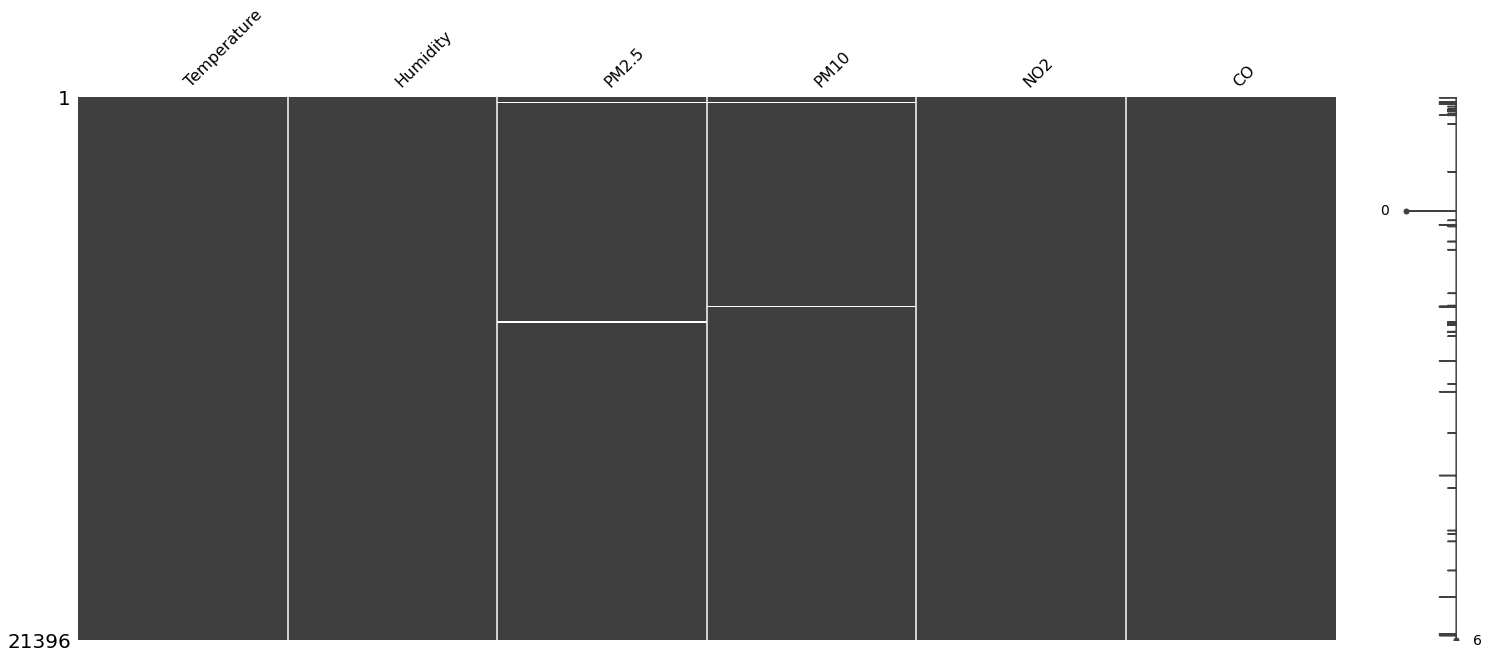

In [12]:
msno.matrix( df );

# Visualise component series

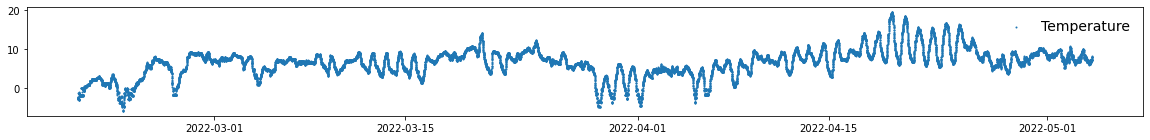

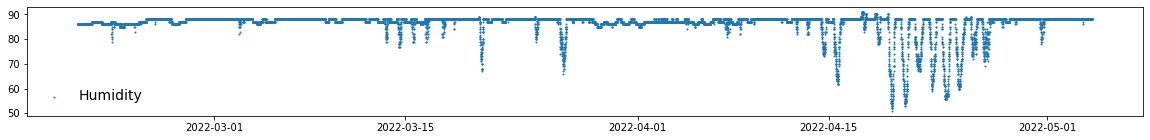

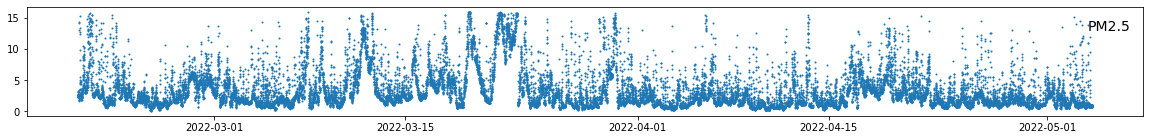

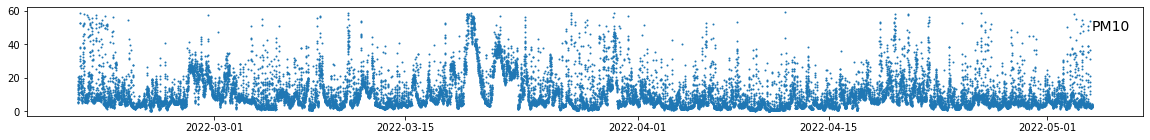

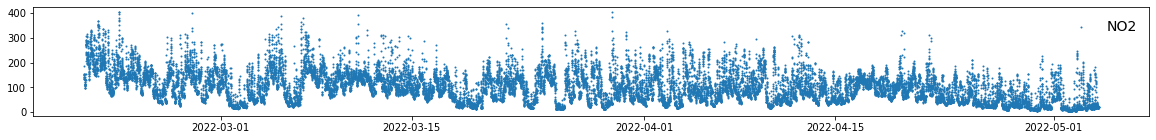

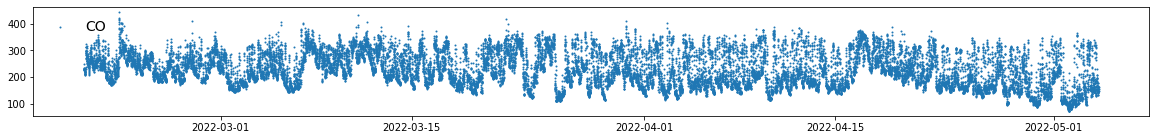

In [13]:
for feature in df.columns:
    plt.figure( figsize=(20, 2) )
    
    plt.scatter(df.index, df[feature], s = 1)
    plt.legend([feature], frameon = False, fontsize = 14)
    plt.plot()

# Examine stationarity 

In [14]:
from utils.stationarity import *

ST = StationarityTests()

for feature in df.columns:
    try:
        print('Feature: {}'.format( feature))
        print(50*'*')
        ST.ADF(  df[feature].interpolate() )
        ST.KPSS( df[feature].interpolate() )
    except:
        continue
    

Feature: Temperature
**************************************************
* Augmented Dickey-Fuller test *
ADF Test Statistic     -7.648801e+00
p-value                 1.812391e-11
# Lags Used             2.300000e+01
# Observations Used     2.137200e+04
Critical Value (1%)    -3.430656e+00
Critical Value (5%)    -2.861675e+00
Critical Value (10%)   -2.566842e+00
dtype: float64
[INFO] Series is stationary


* Kwiatkowski–Phillips–Schmidt–Shin test *
KPSS test statistic       8.297255
p-value                   0.010000
# Lags Used              46.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
[INFO] Series in non-stationary


Feature: Humidity
**************************************************


/Users/livieris/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


* Augmented Dickey-Fuller test *
ADF Test Statistic     -1.245706e+01
p-value                 3.471943e-23
# Lags Used             2.500000e+01
# Observations Used     2.137000e+04
Critical Value (1%)    -3.430656e+00
Critical Value (5%)    -2.861675e+00
Critical Value (10%)   -2.566842e+00
dtype: float64
[INFO] Series is stationary


* Kwiatkowski–Phillips–Schmidt–Shin test *
KPSS test statistic       3.238211
p-value                   0.010000
# Lags Used              46.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
[INFO] Series in non-stationary


Feature: PM2.5
**************************************************


/Users/livieris/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


* Augmented Dickey-Fuller test *
ADF Test Statistic     -1.451223e+01
p-value                 5.699703e-27
# Lags Used             1.400000e+01
# Observations Used     2.138100e+04
Critical Value (1%)    -3.430656e+00
Critical Value (5%)    -2.861675e+00
Critical Value (10%)   -2.566842e+00
dtype: float64
[INFO] Series is stationary


* Kwiatkowski–Phillips–Schmidt–Shin test *
KPSS test statistic       3.318727
p-value                   0.010000
# Lags Used              46.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
[INFO] Series in non-stationary


Feature: PM10
**************************************************


/Users/livieris/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


* Augmented Dickey-Fuller test *
ADF Test Statistic     -1.783730e+01
p-value                 3.116183e-30
# Lags Used             1.300000e+01
# Observations Used     2.138200e+04
Critical Value (1%)    -3.430656e+00
Critical Value (5%)    -2.861675e+00
Critical Value (10%)   -2.566842e+00
dtype: float64
[INFO] Series is stationary


* Kwiatkowski–Phillips–Schmidt–Shin test *
KPSS test statistic       2.186243
p-value                   0.010000
# Lags Used              46.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
[INFO] Series in non-stationary


Feature: NO2
**************************************************


/Users/livieris/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


* Augmented Dickey-Fuller test *
ADF Test Statistic     -8.450041e+00
p-value                 1.671949e-13
# Lags Used             3.900000e+01
# Observations Used     2.135600e+04
Critical Value (1%)    -3.430656e+00
Critical Value (5%)    -2.861675e+00
Critical Value (10%)   -2.566842e+00
dtype: float64
[INFO] Series is stationary


* Kwiatkowski–Phillips–Schmidt–Shin test *
KPSS test statistic      10.937118
p-value                   0.010000
# Lags Used              46.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
[INFO] Series in non-stationary


Feature: CO
**************************************************


/Users/livieris/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


* Augmented Dickey-Fuller test *
ADF Test Statistic     -8.812944e+00
p-value                 1.968798e-14
# Lags Used             3.900000e+01
# Observations Used     2.135600e+04
Critical Value (1%)    -3.430656e+00
Critical Value (5%)    -2.861675e+00
Critical Value (10%)   -2.566842e+00
dtype: float64
[INFO] Series is stationary


* Kwiatkowski–Phillips–Schmidt–Shin test *
KPSS test statistic       6.053081
p-value                   0.010000
# Lags Used              46.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
[INFO] Series in non-stationary




/Users/livieris/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


# Boxplot

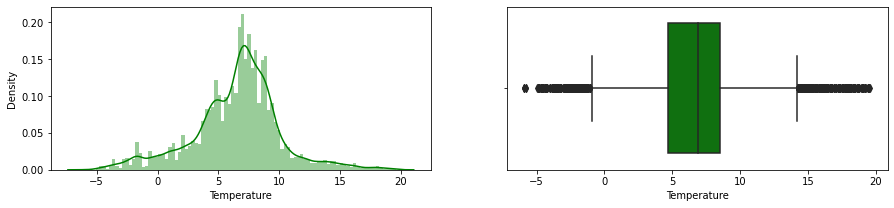

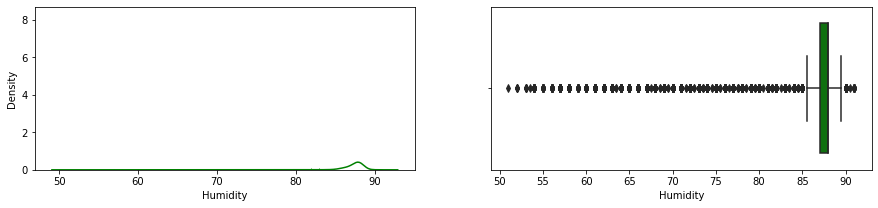

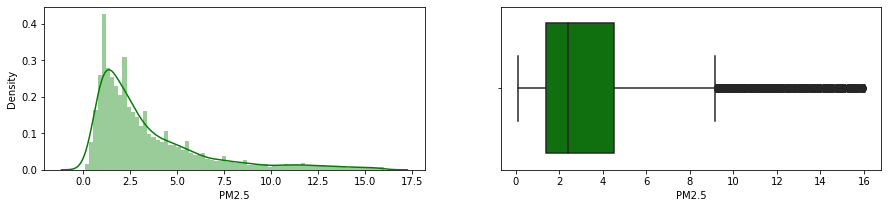

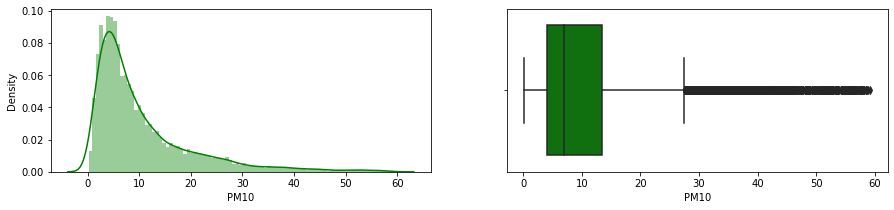

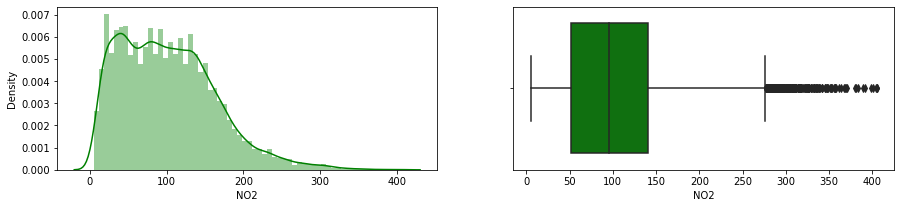

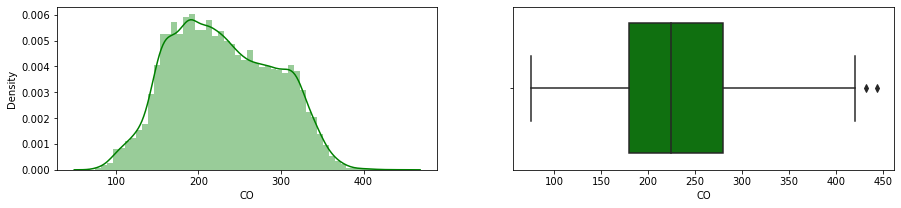

In [15]:
for feature in df.columns:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 3));
    #
    #
    sns.distplot(df[ feature ], color='g', bins='auto', hist_kws={'alpha': 0.4}, ax=ax[0]);
    sns.boxplot(x = feature, data = df, color='g', ax=ax[1]);

In [16]:
df.dropna(inplace=True)

# DayOfWeek/Hour/Morning-Night boxplot

In [17]:
df['DayOfWeek'] = df.index.dayofweek
df['Hour']      = df.index.hour

df.head(3)

,Temperature,Humidity,PM2.5,PM10,NO2,CO,DayOfWeek,Hour
Date,,,,,,,,
2022-02-19 00:00:00,-2.4,86.0,2.4,4.7,185.0,248.0,5,0
2022-02-19 00:05:00,-2.4,86.0,2.5,5.5,150.0,232.0,5,0
2022-02-19 00:10:00,-2.4,86.0,2.5,5.5,135.0,227.0,5,0


## Day Of Week

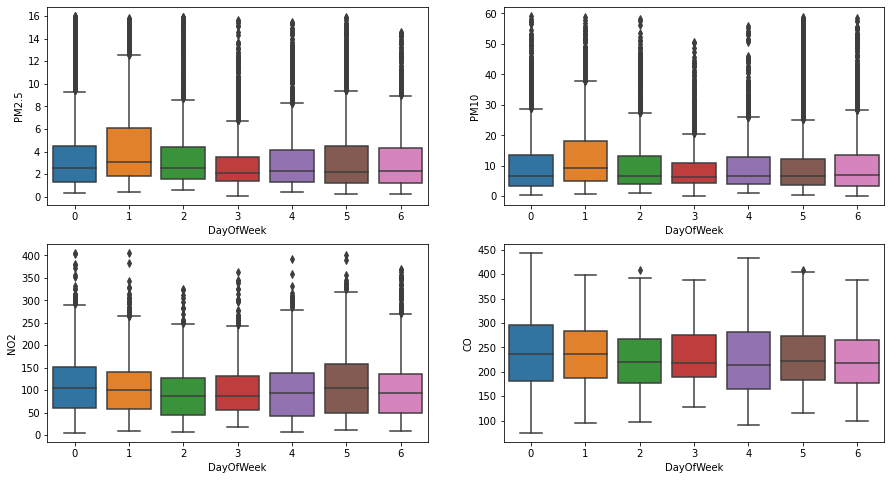

In [21]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))

sns.boxplot(data=df, x='DayOfWeek', y='PM2.5', ax=ax[0][0])
sns.boxplot(data=df, x='DayOfWeek', y='PM10',  ax=ax[0][1])
sns.boxplot(data=df, x='DayOfWeek', y='NO2', ax=ax[1][0])
sns.boxplot(data=df, x='DayOfWeek', y='CO',  ax=ax[1][1])

plt.show()

## Hour

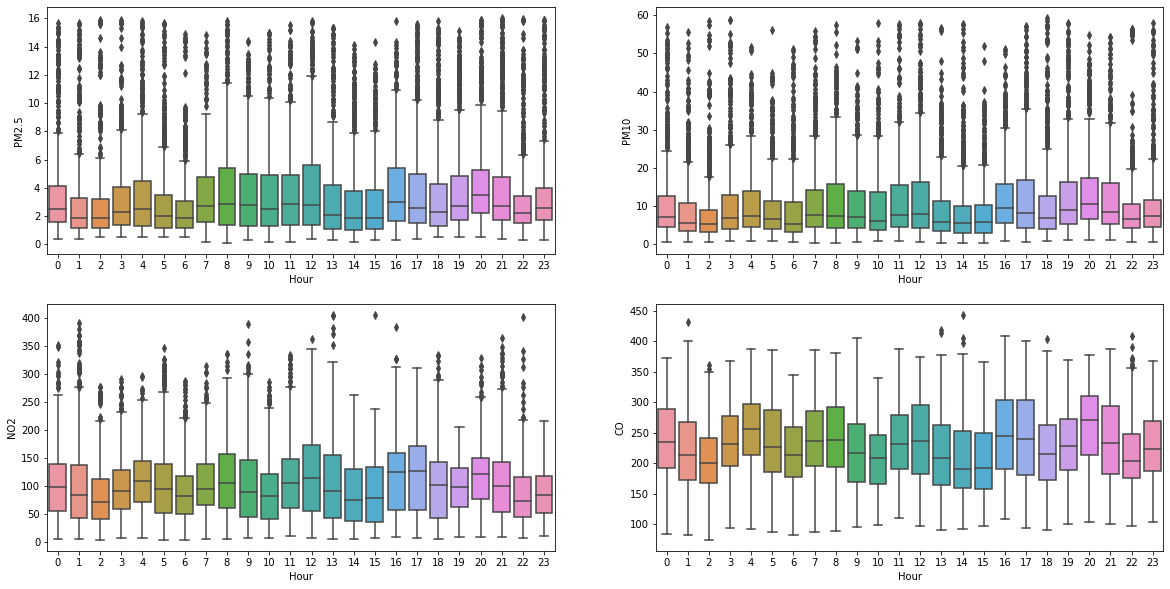

In [22]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 10))

sns.boxplot(data=df, x='Hour', y='PM2.5', ax=ax[0][0])
sns.boxplot(data=df, x='Hour', y='PM10',  ax=ax[0][1])
sns.boxplot(data=df, x='Hour', y='NO2',   ax=ax[1][0])
sns.boxplot(data=df, x='Hour', y='CO',    ax=ax[1][1])

plt.show()

In [23]:
df.drop( ['DayOfWeek', 'Hour'], axis=1, inplace=True)

# ACF - PACF

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

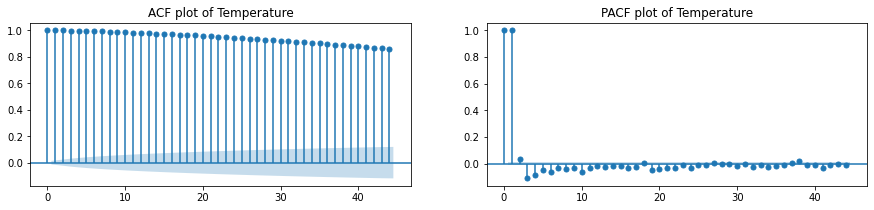

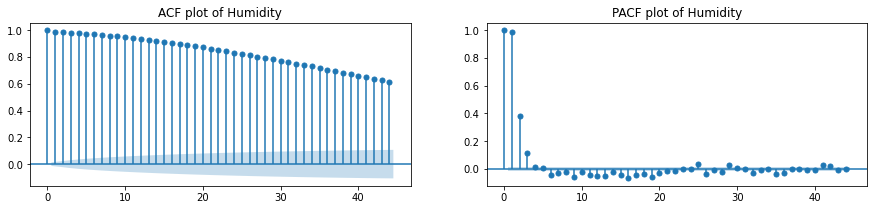

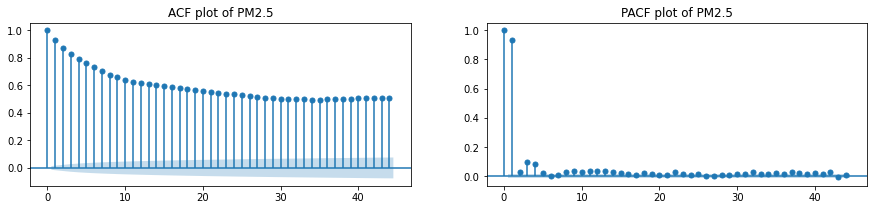

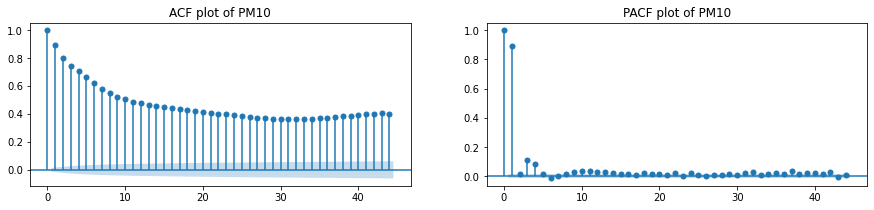

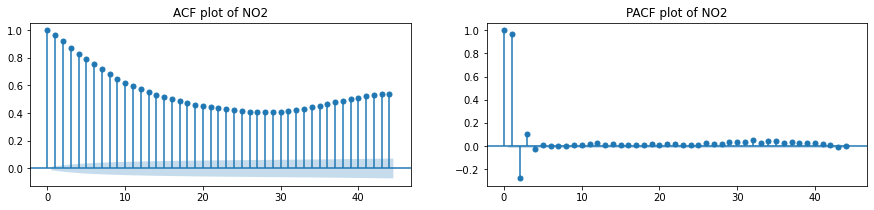

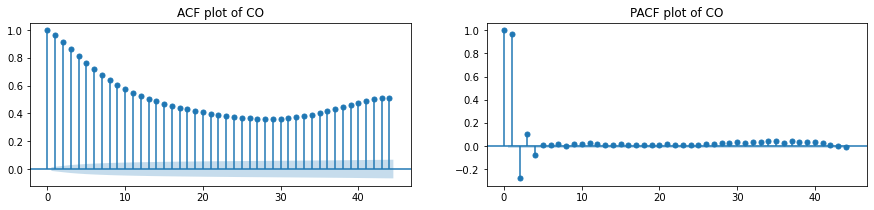

In [25]:
for feature in df.columns:
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 3))
    plot_acf(  df[feature], ax=ax[0])
    plot_pacf( df[feature], ax=ax[1])
    
    ax[0].set_title( 'ACF plot of {}'.format(feature) )
    ax[1].set_title( 'PACF plot of {}'.format(feature) )

    plt.show()

# Pearson correlation matrix

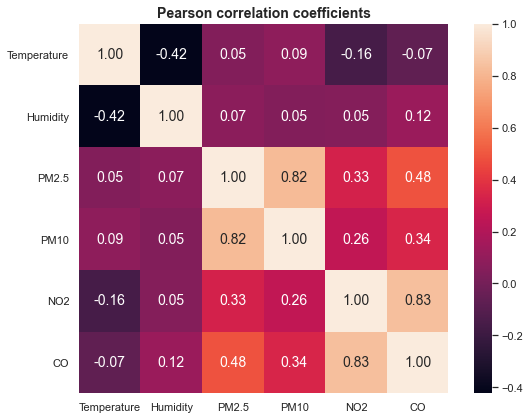

In [26]:
# Calculate correlation matrix
#
corr = df.corr()  


plt.figure(figsize = (8, 6))
sns.set(font_scale = 1)

sns.heatmap(data        = corr,
            cbar        = True,
            annot       = True,
            square      = True,
            fmt         = '.2f',
            annot_kws   = {'size': 14},
            #
            yticklabels = df.columns,
            xticklabels = df.columns)


plt.title('Pearson correlation coefficients', size = 14, weight='bold')
plt.tight_layout()
plt.show()

# Multicollinearity detection

In [27]:
# Calculate VIF
#
calculateVIF(df, df.columns[:-1])

,VIF,Tolerance,Status
PM2.5,3.206701,0.311847,Moderately correlated
PM10,3.069112,0.325827,Moderately correlated
Temperature,1.279342,0.781652,Moderately correlated
Humidity,1.234178,0.810256,Moderately correlated
NO2,1.162859,0.859950,Moderately correlated


# Covariance matrix

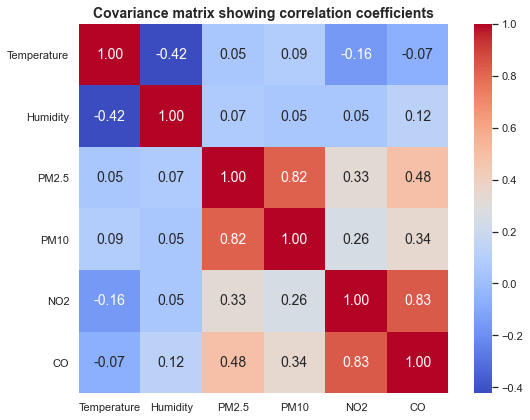

In [28]:
from sklearn.preprocessing import StandardScaler 

# Standarized dataset
#
stdsc  = StandardScaler() 

df_std = stdsc.fit_transform( df.values )



# Calculate Covariance matrix
#
cov_mat = np.cov( df_std.T )


# Visualize Covariance matrix
#
plt.figure(figsize = (8, 6))
sns.set(font_scale = 1)

sns.heatmap(data        = cov_mat,
            cbar        = True,
            annot       = True,
            square      = True,
            fmt         = '.2f',
            annot_kws   = {'size': 14},
            cmap        = 'coolwarm',                 
            #
            yticklabels = df.columns,
            xticklabels = df.columns)

plt.title('Covariance matrix showing correlation coefficients', size = 14, weight='bold')
plt.tight_layout()
plt.show()

# Non-linear correlation detection with mutual information

In [29]:
from ennemi import estimate_mi
from ennemi import pairwise_mi

# Pairwise comparisons between a set of variables
#
pairwise = pairwise_mi( df, normalize=True )

## Visualize Mutual Information matrix

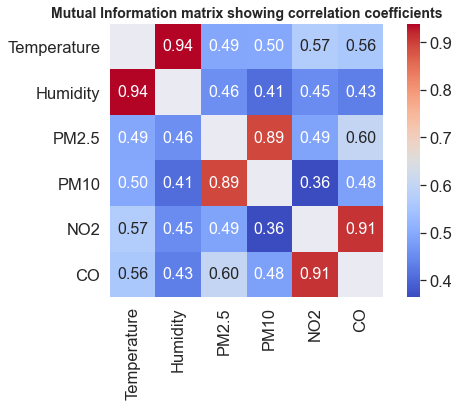

In [30]:
# Visualize Mutual Information matrix
#
plt.figure(figsize = (8, 6))
sns.set(font_scale = 1.5)

sns.heatmap(data        = pairwise,
            cbar        = True,
            annot       = True,
            square      = True,
            fmt         = '.2f',
            annot_kws   = {'size': 16},
            cmap        = 'coolwarm',                 
            #
            yticklabels = df.columns,
            xticklabels = df.columns)

plt.title('Mutual Information matrix showing correlation coefficients', size = 14, weight='bold')
plt.tight_layout()
plt.show()

# $\phi_k$-Correlation

In [31]:
import phik
from   phik        import report
from   phik.report import plot_correlation_matrix

## $\phi_k$-matrix

In [32]:
phik_overview = df.phik_matrix();

interval columns not set, guessing: ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'CO']


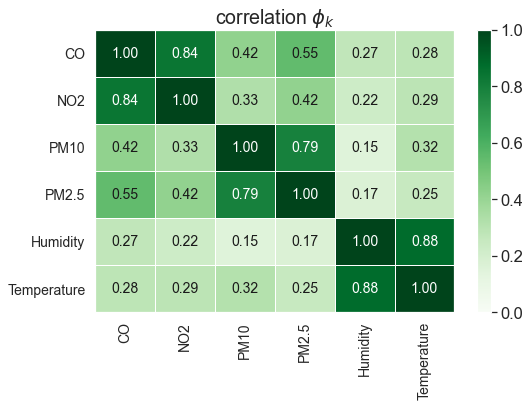

In [33]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels  = phik_overview.columns, 
                        y_labels  = phik_overview.index, 
                        vmin      = 0, 
                        vmax      = 1, 
                        color_map = "Greens", 
                        title     = r"correlation $\phi_k$", 
                        #
                        fontsize_factor = 1.4, 
                        figsize         = (8, 6))

plt.tight_layout()

# Pair-plot information of selected features 

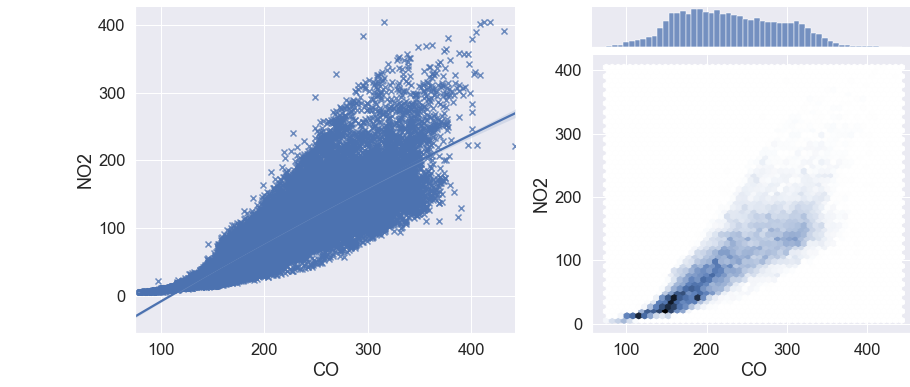

In [34]:
fig1 = sns.lmplot(data    = df,
                  x       = 'CO', 
                  y       = 'NO2',
                  order   = 2, 
                  markers = ['x'],
                  palette = "Set1")


fig2 = sns.jointplot(data    = df,
                     x       = 'CO', 
                     y       = 'NO2',
                     kind    = 'hex')


fig = plt.figure( figsize=(15, 6) )
gs  = gridspec.GridSpec(nrows=1, ncols=2)

sfg.SeabornFig2Grid(fig1, fig, gs[0])
sfg.SeabornFig2Grid(fig2, fig, gs[1])  

plt.show()

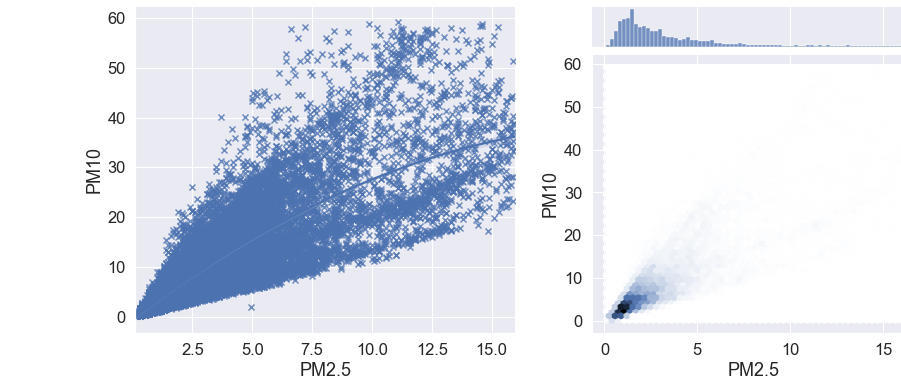

In [35]:
fig1 = sns.lmplot(data    = df,
                  x       = 'PM2.5', 
                  y       = 'PM10',
                  order   = 2, 
                  markers = ['x'],
                  palette = "Set1")


fig2 = sns.jointplot(data    = df,
                     x       = 'PM2.5', 
                     y       = 'PM10',
                     kind    = 'hex')


fig = plt.figure( figsize=(15, 6) )
gs  = gridspec.GridSpec(nrows=1, ncols=2)

sfg.SeabornFig2Grid(fig1, fig, gs[0])
sfg.SeabornFig2Grid(fig2, fig, gs[1])  

plt.show()